In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from tqdm import tqdm

## Comparison with ARPA's data in order to find a fault

### Define some constants

In [22]:
START_DATE_BOARD_20 = '2022-11-03'
END_DATE_BOARD_20   = '2023-03-31'

### Read dataset (PM2.5 from board 20)

In [23]:
df_pm25_1             = pd.read_csv('./dataset/s250.csv') #mu_g/m^3
df_pm25_1.timestamp   = pd.to_datetime(df_pm25_1.timestamp)
df_pm25_1.drop_duplicates(inplace=True)
df_pm25_1.sort_values(by='timestamp', inplace=True)

print(min(df_pm25_1.timestamp))
print(max(df_pm25_1.timestamp))

2022-10-13 07:33:50
2023-04-08 02:57:36


In [24]:
print('Before:', len(df_pm25_1))
df_pm25_1 = df_pm25_1.loc[(df_pm25_1['timestamp'] >= START_DATE_BOARD_20) & (df_pm25_1['timestamp'] <= END_DATE_BOARD_20)]
df_pm25_1 = df_pm25_1.groupby(pd.Grouper(key='timestamp', freq='H')).mean().reset_index()
df_pm25_1.dropna(inplace=True)
print('After:', len(df_pm25_1))

In [25]:
df_pm25_1.head()

,timestamp,data
0,2022-11-04 14:00:00,2.373464
1,2022-11-04 15:00:00,3.168191
2,2022-11-04 16:00:00,2.423541
3,2022-11-04 17:00:00,0.978332
4,2022-11-04 18:00:00,1.448523


### Read dataset (TEMPERATURE from board 20)

In [26]:
df_temp_1 = pd.read_csv('./dataset/s258.csv')  #°C
df_temp_1.timestamp   = pd.to_datetime(df_temp_1.timestamp)
df_temp_1.drop_duplicates(inplace=True)
df_temp_1.sort_values(by='timestamp', inplace=True)

print(min(df_temp_1.timestamp))
print(max(df_temp_1.timestamp))
print('Before:', len(df_temp_1))

df_temp_1 = df_temp_1.groupby(pd.Grouper(key='timestamp', freq='D')).mean().reset_index()
df_temp_1.dropna(inplace=True)
print('After:', len(df_temp_1))

df_temp_1.head()

2022-11-04 14:15:50
2023-04-08 02:57:34
Before: 3332826
After: 131


,timestamp,data
0,2022-11-04,17.968302
5,2022-11-09,18.245630
6,2022-11-10,17.837708
7,2022-11-11,17.690146
8,2022-11-12,15.642468


### Read dataset (PM2.5 from board 21)

In [27]:
df_pm25_21_263             = pd.read_csv('./dataset/board21/s263.csv') #mu_g/m^3
df_pm25_21_263.timestamp   = pd.to_datetime(df_pm25_21_263.timestamp)
df_pm25_21_263.drop_duplicates(inplace=True)
df_pm25_21_263.sort_values(by='timestamp', inplace=True)

print(min(df_pm25_21_263.timestamp))
print(max(df_pm25_21_263.timestamp))

2022-10-13 07:44:40
2023-06-06 10:03:55


In [28]:
print('Before:', len(df_pm25_21_263))
#df_pm25_21_263 = df_pm25_21_263.loc[(df_pm25_21_263['timestamp'] >= START_DATE_BOARD_20) & (df_pm25_21_263['timestamp'] <= END_DATE_BOARD_20)]
df_pm25_21_263 = df_pm25_21_263.groupby(pd.Grouper(key='timestamp', freq='H')).mean().reset_index()
df_pm25_21_263.dropna(inplace=True)
print('After:', len(df_pm25_21_263))

### Read dataset (TEMPERATURE from board 21)

In [41]:
df_temp_board_21 = pd.read_csv('./dataset/board21/s271.csv')  #°C
df_temp_board_21.timestamp   = pd.to_datetime(df_temp_board_21.timestamp)
df_temp_board_21.drop_duplicates(inplace=True)
df_temp_board_21.sort_values(by='timestamp', inplace=True)

print(min(df_temp_board_21.timestamp))
print(max(df_temp_board_21.timestamp))
print('Before:', len(df_temp_1))

df_temp_board_21 = df_temp_board_21.groupby(pd.Grouper(key='timestamp', freq='D')).mean().reset_index()
df_temp_board_21.dropna(inplace=True)
print('After:', len(df_temp_board_21))

df_temp_board_21.head()

2022-10-13 07:44:41
2023-06-06 10:03:55
Before: 131
After: 201


,timestamp,data
0,2022-10-13,24.535987
21,2022-11-03,15.868993
22,2022-11-04,18.395831
27,2022-11-09,17.017170
28,2022-11-10,16.550265


### Read ARPA (TEMPERATURE) from 11/2022 to 04/2023

In [29]:
df_arpa_temp = pd.read_csv('./dataset/arpa/temperature/TORINO GIARDINI REALI.csv')
df_arpa_temp.drop(columns=['Temperatura massima (°C)', 'Temperatura minima (°C)', 'Temperatura classe'], inplace=True)
df_arpa_temp.rename(columns={'Temperatura media (°C)': 'data', 'DATA': 'timestamp'}, inplace=True)
df_arpa_temp.timestamp   = pd.to_datetime(df_arpa_temp.timestamp, format="%Y-%m-%d")
print(len(df_arpa_temp))
df_arpa_temp.head()

181


,timestamp,data
0,2022-11-01,13.4
1,2022-11-02,12.6
2,2022-11-03,13.4
3,2022-11-04,12.5
4,2022-11-05,11.0


### Read ARPA (PM.25) from 2022 to 2023

In [30]:
df_arpa_2022 = pd.read_csv('./dataset/arpa/Dati PM10_PM2.5_2020-2022.csv', sep=';')
df_arpa_2023 = pd.read_csv('./dataset/arpa/Torino-Rubino_Polveri-sottili_2023-01-01_2023-04-30.csv', sep=';', index_col=False)

In [31]:
df_arpa_2022.describe()

,PM10,PM2.5
count,22001.000000,22295.000000
mean,27.805509,19.459565
std,21.343729,16.159527
min,3.000000,2.000000
25%,13.000000,7.000000
50%,22.000000,14.000000
75%,37.000000,27.000000
max,188.000000,134.000000


In [32]:
df_arpa_2023.describe()

,Id Rete Monitoraggio,Codice Istat Comune,Progr. Punto Comune,Id Un. misura,Valore
count,3000.0,3000.0,3000.0,3000.0,2843.000000
mean,13.0,1272.0,822.0,23.0,19.826592
std,0.0,0.0,0.0,0.0,14.598154
min,13.0,1272.0,822.0,23.0,3.000000
25%,13.0,1272.0,822.0,23.0,8.000000
50%,13.0,1272.0,822.0,23.0,17.000000
75%,13.0,1272.0,822.0,23.0,30.000000
max,13.0,1272.0,822.0,23.0,187.000000


Take only correct values

In [33]:
df_arpa_2022.dropna(inplace=True)
df_arpa_2023 = df_arpa_2023[df_arpa_2023.Stato == 'V']

In [34]:
print(min(df_arpa_2022.Data), max(df_arpa_2022.Data))
print(min(df_arpa_2023['Data rilevamento']), max(df_arpa_2023['Data rilevamento']))

01/01/2021 31/12/2022
01/01/2023 31/03/2023


In [35]:
def change_hour_format(hour: str) -> str:
    if len(hour.split(':')) <= 2:
        return hour + ":00"
    return hour

In [36]:
df_arpa = pd.DataFrame(columns=['timestamp', 'pm25'])
data_series_2022 = df_arpa_2022['Data'] + " " + df_arpa_2022['Ora'].map(lambda x: change_hour_format(x))
data_series_2023 = df_arpa_2023['Data rilevamento'] + ' ' + df_arpa_2023['Ora'].map(lambda x: change_hour_format(x))
pm25_series = df_arpa_2022['PM2.5']

data_series = pd.concat([data_series_2022, data_series_2023], ignore_index = True)
pm25_series = pd.concat([pm25_series, df_arpa_2023['Valore']], ignore_index = True)

df_arpa['timestamp']   = data_series
df_arpa['pm25']        = pm25_series
df_arpa.timestamp   = pd.to_datetime(df_arpa.timestamp, format="%d/%m/%Y %H:%M:%S")

In [37]:
print(min(df_arpa.timestamp), max(df_arpa.timestamp))

2020-01-03 13:00:00 2023-04-30 23:59:00


In [38]:
df_arpa.describe()

,timestamp,pm25
count,24396,24396.000000
mean,2021-08-30 12:37:56.227250432,19.079111
min,2020-01-03 13:00:00,2.000000
25%,2020-10-14 09:30:00,7.000000
50%,2021-07-23 11:30:00,15.000000
75%,2022-08-14 14:15:00,27.000000
max,2023-04-30 23:59:00,187.000000
std,NaN,15.478302


## Start comparison analysis between our data and ARPA's data

### PM.25 data comparison

Filter ARPA's data on the same range of our sensors

In [19]:
mask = (df_arpa['timestamp'] >= min(df_pm25_1.timestamp)) & (df_arpa['timestamp'] <= max(df_pm25_1.timestamp))
mask_2 = (df_arpa['timestamp'] >= min(df_pm25_21_263.timestamp)) & (df_arpa['timestamp'] <= max(df_pm25_21_263.timestamp))
df_arpa_filtered = df_arpa.loc[mask]
df_arpa_filtered_21_263 = df_arpa.loc[mask_2]

Plot ARPA time series

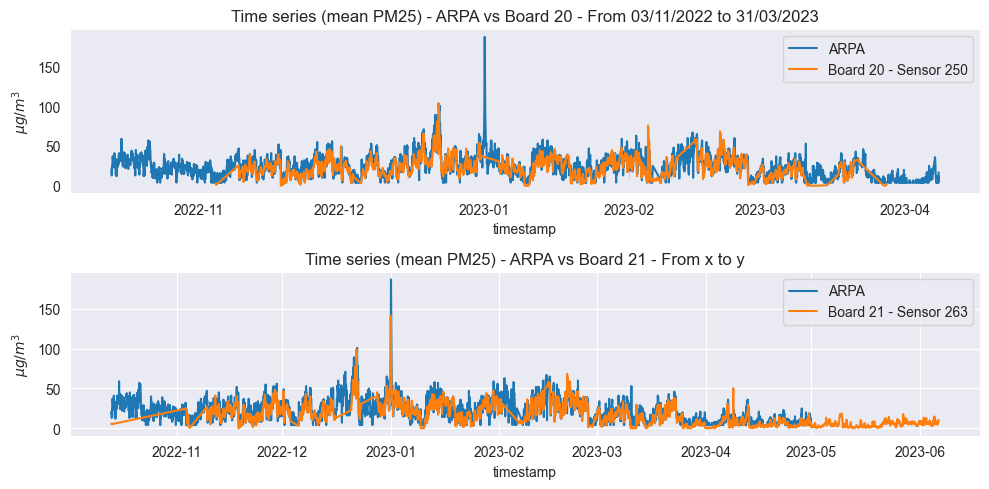

In [39]:
_, ax = plt.subplots(2, 1, figsize=(10, 5))
sns.lineplot(x = "timestamp", y = "pm25", data = df_arpa_filtered, ax=ax[0], label='ARPA')
sns.lineplot(x = "timestamp", y = "data", data = df_pm25_1, ax=ax[0], label='Board 20 - Sensor 250')
sns.lineplot(x = "timestamp", y = "pm25", data = df_arpa_filtered_21_263, ax=ax[1], label='ARPA')
sns.lineplot(x = "timestamp", y = "data", data = df_pm25_21_263, ax=ax[1], label='Board 21 - Sensor 263')
ax[0].set_ylabel(r'$\mu g/m^3$')
ax[1].set_ylabel(r'$\mu g/m^3$')
ax[0].set_title('Time series (mean PM25) - ARPA vs Board 20 - From 03/11/2022 to 31/03/2023')
ax[1].set_title('Time series (mean PM25) - ARPA vs Board 21 - From x to y')
ax[0].grid()
ax[1].grid()
plt.grid()
plt.tight_layout()
plt.show()

Scatter plot (correlation analysis)

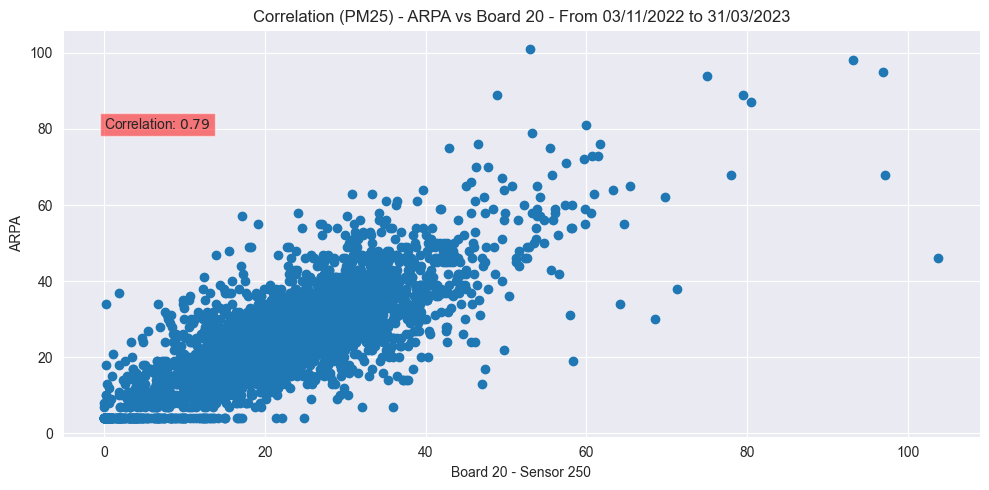

In [106]:
df_merged = df_arpa_filtered.merge(df_pm25_1, left_on=['timestamp'],right_on=['timestamp'])
_, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(df_merged['data'], df_merged['pm25'])
ax.text(0, 80, r'Correlation: $' + str(round(df_merged.corr()['pm25']['data'], 2)) + '$', fontsize=10, bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 3})
ax.set_xlabel('Board 20 - Sensor 250')
ax.set_ylabel('ARPA')
ax.set_title('Correlation (PM25) - ARPA vs Board 20 - From 03/11/2022 to 31/03/2023')
ax.grid()
plt.grid()
plt.tight_layout()
plt.show()

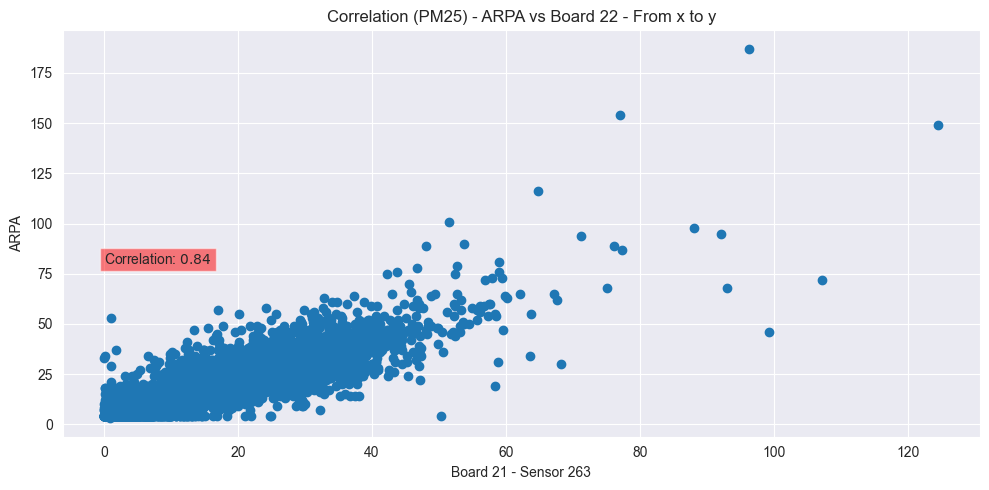

In [40]:
df_merged_21_263 = df_arpa_filtered_21_263.merge(df_pm25_21_263, left_on=['timestamp'],right_on=['timestamp'])
_, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(df_merged_21_263['data'], df_merged_21_263['pm25'])
ax.text(0, 80, r'Correlation: $' + str(round(df_merged_21_263.corr()['pm25']['data'], 2)) + '$', fontsize=10, bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 3})
ax.set_xlabel('Board 21 - Sensor 263')
ax.set_ylabel('ARPA')
ax.set_title('Correlation (PM25) - ARPA vs Board 22 - From x to y')
ax.grid()
plt.grid()
plt.tight_layout()
plt.show()

### Temparature data comparison

Plot ARPA time series

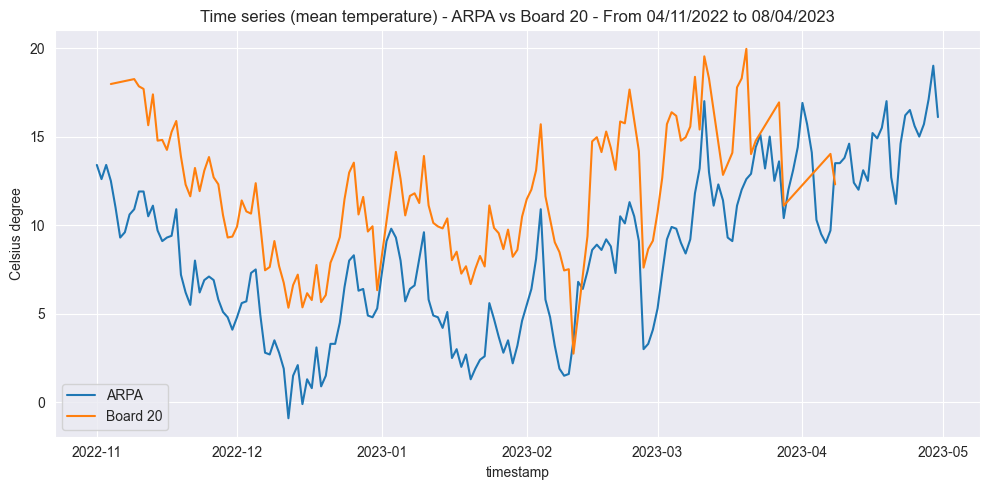

In [107]:
_, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.lineplot(x = "timestamp", y = "data", data = df_arpa_temp, ax=ax, label='ARPA')
sns.lineplot(x = "timestamp", y = "data", data = df_temp_1, ax=ax, label='Board 20')
ax.set_ylabel('Celsius degree')
ax.set_title('Time series (mean temperature) - ARPA vs Board 20 - From 04/11/2022 to 08/04/2023')
ax.grid()
plt.grid()
plt.tight_layout()
plt.show()

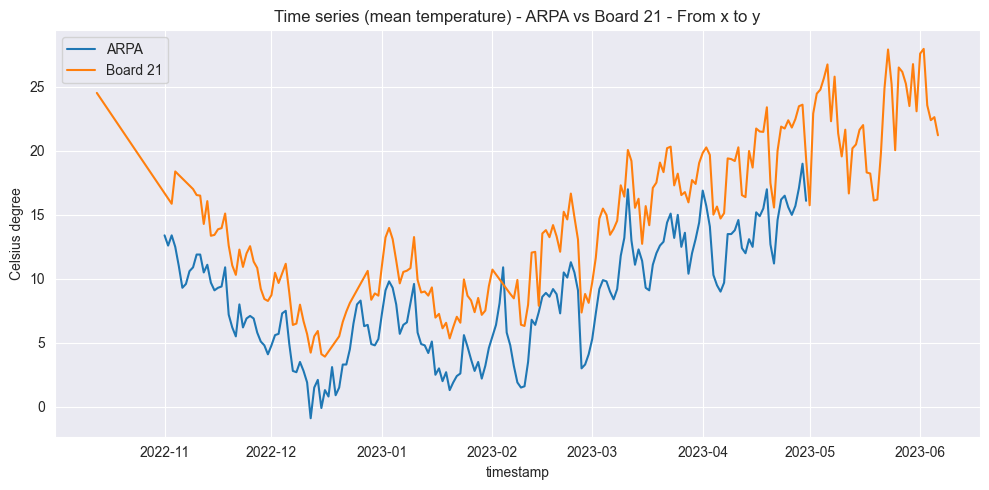

In [42]:
_, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.lineplot(x = "timestamp", y = "data", data = df_arpa_temp, ax=ax, label='ARPA')
sns.lineplot(x = "timestamp", y = "data", data = df_temp_board_21, ax=ax, label='Board 21')
ax.set_ylabel('Celsius degree')
ax.set_title('Time series (mean temperature) - ARPA vs Board 21 - From x to y')
ax.grid()
plt.grid()
plt.tight_layout()
plt.show()

Scatter plot (correlation analysis)

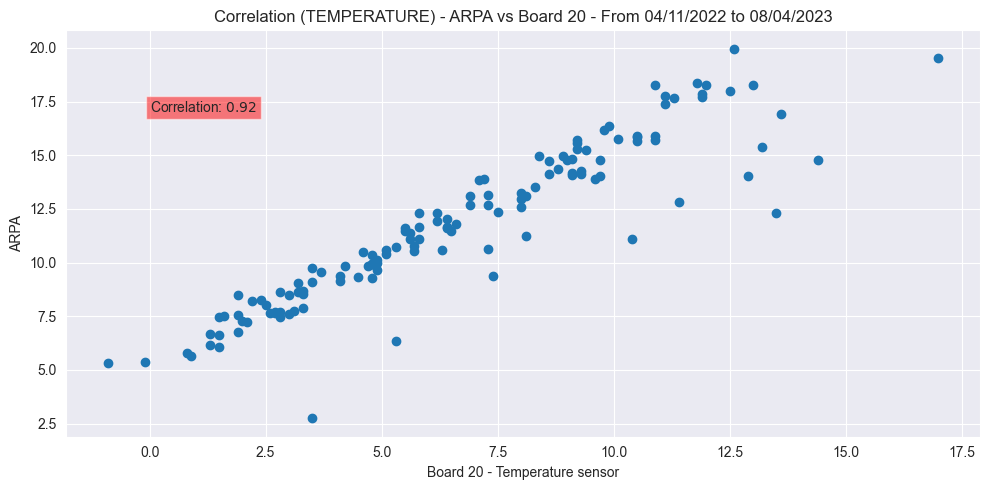

In [112]:
df_merged = df_arpa_temp.merge(df_temp_1, left_on=['timestamp'],right_on=['timestamp'])
_, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(df_merged['data_x'], df_merged['data_y'])
ax.text(0, 17, r'Correlation: $' + str(round(df_merged.corr()['data_x']['data_y'], 2)) + '$', fontsize=10, bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 3})
ax.set_xlabel('Board 20 - Temperature sensor')
ax.set_ylabel('ARPA')
ax.set_title('Correlation (TEMPERATURE) - ARPA vs Board 20 - From 04/11/2022 to 08/04/2023')
ax.grid()
plt.grid()
plt.tight_layout()
plt.show()

## Failures discovering
In this phase I'm gonna try to discover some failures by means find a break point in sensors in which from that point on, the sensor totally stopped working

In [2]:
START_DATE_BOARD    = '2022-11-03'
END_DATE_BOARD      = '2023-06-15'
PM25_DIRECTORY      = './dataset/'
PM2_MAP = {
    "board20": ["s250.csv", "s252.csv", "s256.csv", "s258.csv"],
    "board21": ["s263.csv", "s265.csv", "s267.csv", "s269.csv"],
    "board22": ["s276.csv", "s278.csv", "s280.csv", "s282.csv"],
    "board25": ["s315.csv", "s317.csv", "s319.csv", "s321.csv"],
    "board29": ["s367.csv", "s369.csv", "s371.csv", "s373.csv"],
    "board31": ["s393.csv", "s395.csv", "s397.csv", "s399.csv"]
}

### Build ARPA dataset (as before)

In [32]:
def change_hour_format(hour: str) -> str:
    return hour + ":00" if len(hour.split(':')) <= 2 else hour

df_arpa_2022 = pd.read_csv('./dataset/arpa/Dati PM10_PM2.5_2020-2022.csv', sep=';')
df_arpa_2023 = pd.read_csv('./dataset/arpa/Torino-Rubino_Polveri-sottili_2023-01-01_2023-06-30.csv', sep=';', index_col=False)
df_arpa_2022.dropna(inplace=True)
df_arpa_2023 = df_arpa_2023[df_arpa_2023.Stato == 'V']

df_arpa = pd.DataFrame(columns=['timestamp', 'pm25'])
data_series_2022 = df_arpa_2022['Data'] + " " + df_arpa_2022['Ora'].map(lambda x: change_hour_format(x))
data_series_2023 = df_arpa_2023['Data rilevamento'] + ' ' + df_arpa_2023['Ora'].map(lambda x: change_hour_format(x))
pm25_series = df_arpa_2022['PM2.5']

data_series = pd.concat([data_series_2022, data_series_2023], ignore_index = True)
pm25_series = pd.concat([pm25_series, df_arpa_2023['Valore']], ignore_index = True)

df_arpa['timestamp']   = data_series
df_arpa['pm25']        = pm25_series
df_arpa.timestamp   = pd.to_datetime(df_arpa.timestamp, format="%d/%m/%Y %H:%M:%S")

# Apply a special filter in which I remove all ARPA's values below 4
df_arpa = df_arpa[df_arpa['pm25'] > 4]

### Build a picture for each sensor in each board

In [52]:
def prepare_pm25_dataframe(file_name: str) -> pd.DataFrame:
    df_pm25             = pd.read_csv(file_name) #mu_g/m^3
    df_pm25.timestamp   = pd.to_datetime(df_pm25.timestamp)
    df_pm25.drop_duplicates(inplace=True)
    df_pm25.sort_values(by='timestamp', inplace=True)
    df_pm25 = df_pm25.loc[(df_pm25['timestamp'] >= START_DATE_BOARD) & (df_pm25['timestamp'] <= END_DATE_BOARD)]
    df_pm25 = df_pm25.groupby(pd.Grouper(key='timestamp', freq='H')).mean().reset_index()
    df_pm25.dropna(inplace=True)
    return df_pm25

def draw_time_series(df_arpa: pd.DataFrame, df_pm25: pd.DataFrame, board: str='', sensor: str='') -> None:
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    sns.lineplot(x = "timestamp", y = "pm25", data = df_arpa, ax=ax, label='ARPA')
    sns.lineplot(x = "timestamp", y = "data", data = df_pm25, ax=ax, label=f'Board {board} - Sensor {sensor}')
    ax.set_ylabel(r'$\mu g/m^3$')
    ax.set_title(f'Time series (mean PM25) - ARPA vs Board {board} - From 03/11/2022 to 15/06/2023')
    ax.grid()
    plt.grid()
    fig.tight_layout()
    fig.savefig(os.path.join('./', 'draws', 'time series', f'time_series_board{board}_s{sensor}.png'))
    plt.close(fig)    # close the figure window

def draw_scatterplot(df_arpa: pd.DataFrame, df_pm25: pd.DataFrame, board: str='', sensor: str='') -> None:
    df_merged = df_arpa.merge(df_pm25, left_on=['timestamp'],right_on=['timestamp'])
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.scatter(df_merged['data'], df_merged['pm25'])
    ax.text(0, 80, r'Correlation: $' + str(round(df_merged.corr()['pm25']['data'], 2)) + '$', fontsize=10, bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 3})
    ax.set_xlabel(f'Board {board} - Sensor {sensor}')
    ax.set_ylabel('ARPA')
    ax.set_title(f'Correlation (PM25) - ARPA vs Board {board} - From 03/11/2022 to 15/06/2023')
    ax.grid()
    plt.grid()
    fig.tight_layout()
    fig.savefig(os.path.join('./', 'draws', 'scatter plots', f'scatter_board{board}_s{sensor}.png'))
    plt.close(fig)    # close the figure window

In [53]:
for folder_name in tqdm(os.listdir(PM25_DIRECTORY), desc='Analyzing folders'):
    folder = os.path.join(PM25_DIRECTORY, folder_name)
    if os.path.isdir(folder) and len(folder.split('/')) > 2 and folder.split('/')[2] in PM2_MAP:
        board_number = folder.split('/')[2].replace('board', '')
        files = PM2_MAP[folder.split('/')[2]]
        for file_name in files:
            sensor_number = file_name.split('.')[0].replace('s', '')
            file = os.path.join(folder, file_name)
            if os.path.isfile(file) and file.endswith(".csv"):
                print(f'Start analyzing file {file}')
                df_pm25 = prepare_pm25_dataframe(file)
                mask = (df_arpa['timestamp'] >= min(df_pm25.timestamp)) & (df_arpa['timestamp'] <= max(df_pm25.timestamp))
                df_arpa_filtered = df_arpa.loc[mask]
                draw_time_series(df_arpa_filtered, df_pm25, board=board_number, sensor=sensor_number)
                draw_scatterplot(df_arpa_filtered, df_pm25, board=board_number, sensor=sensor_number)

Analyzing folders:   0%|          | 0/8 [00:00<?, ?it/s]

Start analyzing file ./dataset/board22/s276.csv
Start analyzing file ./dataset/board22/s278.csv
Start analyzing file ./dataset/board22/s280.csv
Start analyzing file ./dataset/board22/s282.csv


Analyzing folders:  12%|█▎        | 1/8 [00:34<04:02, 34.59s/it]

Start analyzing file ./dataset/board25/s315.csv
Start analyzing file ./dataset/board25/s317.csv
Start analyzing file ./dataset/board25/s319.csv
Start analyzing file ./dataset/board25/s321.csv


Analyzing folders:  25%|██▌       | 2/8 [03:48<12:49, 128.19s/it]

Start analyzing file ./dataset/board31/s393.csv
Start analyzing file ./dataset/board31/s395.csv
Start analyzing file ./dataset/board31/s397.csv
Start analyzing file ./dataset/board31/s399.csv


Analyzing folders:  62%|██████▎   | 5/8 [05:42<03:11, 63.72s/it] 

Start analyzing file ./dataset/board20/s250.csv
Start analyzing file ./dataset/board20/s252.csv
Start analyzing file ./dataset/board20/s256.csv
Start analyzing file ./dataset/board20/s258.csv


Analyzing folders:  75%|███████▌  | 6/8 [06:44<02:06, 63.26s/it]

Start analyzing file ./dataset/board29/s367.csv
Start analyzing file ./dataset/board29/s369.csv
Start analyzing file ./dataset/board29/s371.csv
Start analyzing file ./dataset/board29/s373.csv


Analyzing folders:  88%|████████▊ | 7/8 [08:55<01:21, 81.35s/it]

Start analyzing file ./dataset/board21/s263.csv
Start analyzing file ./dataset/board21/s265.csv
Start analyzing file ./dataset/board21/s267.csv
Start analyzing file ./dataset/board21/s269.csv


Analyzing folders: 100%|██████████| 8/8 [10:42<00:00, 80.35s/it]


### Notes of failure discovering

**Board 20**
- It has not a complete dataset: the data points are collected until the end of March (the dataset ends on the beginning of April)
- Sensor 258 worked very poorly: (<-- why?) it seems there was an hardware error (i.e: wrong power levels)
- The trend compared to ARPA data is quite similar (mean of 74% Pearson corr.)
-- sensor 258 is not considered in this comparison indeed it has a -0.09% of Pearson corr.
-- the mid-high correlation level can be explained by the scarcity of the data points in the board 

**Board 21**
- It has a complete dataset (until the begging of June)
- Sensor 267 contains an anomaly at the end of the period
-- at the mid of May it seems to be switched off: the values collected by this sensor are always equal to 0 from 14/05/2023 to 25/05/2023
-- at the end of May it experienced a totally wrong values of pm25:
--- the first peak is on 27/05/2023
--- the second peak starts on 01/06/2023 and ends on 03/06/2023
--- all the values between this interval are always equal to 0
- It can be seen that sensor 267 stops working from 14/05/2023 to the end of the period
- The trend compared to ARPA data is quite similar (mean of 80% Pearson corr.) except for the sensor 267 in which it is 62%

**Board 22**
- It has not a complete dataset: the board seems to was power off for the majority of the time experiment
- It's not possible to use this board for further analysis
- The trend compared to ARPA data is quite similar (mean of 70% Pearson corr.): this means that the collected data follow the ARPA trend even though they are few

**Board 25**
- It has a complete dataset (until the begging of June)
- Each sensor does not show any anomalies in data collection during the experiment
- The trend compared to ARPA data is very similar (mean of 82% Pearson corr.)

**Board 29**
- It has a complete dataset (until the begging of June)
- During the mid of November 2022, the entire board seems to have been switched off (there are no data points in that period)
- Sensor 367 experienced totally wrong values during the beginning of May (a too much high data point)
- The trend compared to ARPA data is very similar (mean of 81% Pearson corr.)

**Board 31**
- It has a complete dataset (until the begging of June)
- During the mid of November 2022, the entire board seems to have been switched off (similar to *Board 29*); the same phenomena occurred at the beginning of January 2023
- The trend compared to ARPA data is very similar (mean of 81% Pearson corr.)

### Check some questions in the previous notes 

In [19]:
df_pm25             = pd.read_csv('./dataset/board21/s267.csv') #mu_g/m^3
df_pm25.timestamp   = pd.to_datetime(df_pm25.timestamp)
df_pm25.drop_duplicates(inplace=True)
df_pm25.sort_values(by='timestamp', inplace=True)
df_pm25 = df_pm25.loc[(df_pm25['timestamp'] >= START_DATE_BOARD) & (df_pm25['timestamp'] <= END_DATE_BOARD)]
#df_pm25 = df_pm25.groupby(pd.Grouper(key='timestamp', freq='H')).mean().reset_index()
#df_pm25.dropna(inplace=True)

In [20]:
df_pm25[(df_pm25.timestamp >= '2023-05-01 00:00:00') & (df_pm25.timestamp <= '2023-05-31 23:59:59')]['timestamp'].dt.strftime('%d/%m/%Y').unique()

array(['01/05/2023', '02/05/2023', '03/05/2023', '04/05/2023',
       '05/05/2023', '06/05/2023', '07/05/2023', '08/05/2023',
       '09/05/2023', '10/05/2023', '11/05/2023', '12/05/2023',
       '13/05/2023', '14/05/2023', '15/05/2023', '16/05/2023',
       '17/05/2023', '18/05/2023', '19/05/2023', '20/05/2023',
       '21/05/2023', '22/05/2023', '23/05/2023', '24/05/2023',
       '25/05/2023', '26/05/2023', '27/05/2023', '28/05/2023',
       '29/05/2023', '30/05/2023', '31/05/2023'], dtype=object)

In [51]:
observation = df_pm25[(df_pm25.timestamp >= '2023-06-01 00:00:00') & (df_pm25.timestamp <= '2023-06-01 23:59:59')]['data']
print(min(observation), observation.mean(), max(observation))

0.0 23.02912103211435 374.0
